Carregamento, limpeza e tratamento de dados

In [2]:
#Importando bibliotecas
import pandas as pd


In [3]:
# Lista de arquivos a serem lidos
arquivos = [
    r"dados/despesa_ceaps_2008.csv",
    r"dados/despesa_ceaps_2009.csv",
    r"dados/despesa_ceaps_2010.csv",
    r"dados/despesa_ceaps_2011.csv",
    r"dados/despesa_ceaps_2012.csv",
    r"dados/despesa_ceaps_2013.csv",
    r"dados/despesa_ceaps_2014.csv",
    r"dados/despesa_ceaps_2015.csv",
    r"dados/despesa_ceaps_2016.csv",
    r"dados/despesa_ceaps_2017.csv",
    r"dados/despesa_ceaps_2018.csv",
    r"dados/despesa_ceaps_2019.csv",
    r"dados/despesa_ceaps_2020.csv",
    r"dados/despesa_ceaps_2021.csv",
    r"dados/despesa_ceaps_2022.csv"
]


In [4]:
# Lista para armazenar os DataFrames lidos
dataframes = []


In [5]:
# Loop para ler cada arquivo e armazenar seu DataFrame correspondente na lista
for arquivo in arquivos:
    df = pd.read_csv(arquivo, encoding='cp1252', sep=';', skiprows=1)
    dataframes.append(df)
    

In [6]:
# Concatenando os DataFrames da lista em um único DataFrame
ceaps_total = pd.concat(dataframes, ignore_index=True)

In [7]:
#Verificando linhas aleatórias do DataFrame
ceaps_total.sample(5)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
198161,2017,7,ANA AMÉLIA,"Locomoção, hospedagem, alimentação, combustíve...",93.489.243/0041-03,Coml. Buffon Comb e Transp. Ltda - Buffon 41,219225,31/07/2017,Aquisição de combustível para veículos utiliza...,80,2072767.0
261232,2019,2,MARA GABRILLI,"Aluguel de imóveis para escritório político, c...",02.558.157/0176-42,TELEFÔNICA BRASIL S/A,001616339,10/02/2019,Despesa com assinatura de TV a cabo no escritó...,"116,18",2117036.0
218235,2017,9,ROBERTO REQUIÃO,"Locomoção, hospedagem, alimentação, combustíve...",11.281.204/0001-64,AUTO POSTO FOLLONI LTDA,77118,06/09/2017,COMBUSTÍVEL PARA AUTOMÓVEL EM ATIVIDADE PARLAM...,"189,33",2078464.0
46721,2011,9,JAYME CAMPOS,"Locomoção, hospedagem, alimentação, combustíve...",04.454.790/0019-65,AIR PB BRASIL S/A,6.253,09/09/2011,NaN,4053,441528.0
181283,2016,9,JOÃO CAPIBERIBE,"Passagens aéreas, aquáticas e terrestres nacio...",26.480.780/0001-08,L. M. TURISMO,17415,09/09/2016,"Companhia Aérea: GOL, Localizador: CBSVYL. Pas...","907,15",2050679.0


In [8]:
#Removendo coluna 'DOCUMENTO'
ceaps_total.drop('DOCUMENTO', axis=1, inplace=True)
ceaps_total.drop('COD_DOCUMENTO', axis=1, inplace=True)

In [9]:
#Verificando valores nulo
ceaps_total.isnull().any()

ANO                  False
MES                  False
SENADOR              False
TIPO_DESPESA         False
CNPJ_CPF              True
FORNECEDOR            True
DATA                  True
DETALHAMENTO          True
VALOR_REEMBOLSADO    False
dtype: bool

In [10]:
#Tratando valores nulo
ceaps_total.CNPJ_CPF = ceaps_total.CNPJ_CPF.fillna('Nao Informado')
ceaps_total.FORNECEDOR = ceaps_total.FORNECEDOR.fillna('Nao Informado')
ceaps_total.DATA = ceaps_total.DATA.fillna('Nao Informado')
ceaps_total.DETALHAMENTO = ceaps_total.DETALHAMENTO.fillna('Nao Informado')

In [11]:
#Verificando coluna 'TIPO_DESPESA'
ceaps_total['TIPO_DESPESA'].value_counts()

TIPO_DESPESA
Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                                                                                                                   133066
Passagens aéreas, aquáticas e terrestres nacionais                                                                                                                                                  68763
Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.                                                                                                            62625
Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.      25838
Divulgação da atividade parlamentar                                                                                                                                                

In [12]:
# Dicionário de mapeamento
mapa_despesas = {
    'Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.': 'Aluguel',
    'Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos. ': 'Despesas gerais',
    'Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar': 'Contratações',
    'Locomoção, hospedagem, alimentação, combustíveis e lubrificantes': 'Locomoção, hospedagem e alimentação',
    'Passagens aéreas, aquáticas e terrestres nacionais': 'Passagens',
    'Divulgação da atividade parlamentar': 'Divulgação',
    'Serviços de Segurança Privada': 'Segurança'
}

In [13]:
# Substituir os valores na própria coluna 'TIPO_DESPESA' usando o dicionário de mapeamento
ceaps_total['TIPO_DESPESA'] = ceaps_total['TIPO_DESPESA'].map(mapa_despesas)

In [14]:
# Preencher valores NaN com um valor padrão ou deixar os valores originais
ceaps_total['TIPO_DESPESA'] = ceaps_total['TIPO_DESPESA'].fillna('Outros')

In [15]:
#Convertendo em float
ceaps_total['VALOR_REEMBOLSADO'] = ceaps_total['VALOR_REEMBOLSADO'].astype(float)

ValueError: could not convert string to float: '12351,52'

Não foi possivel converter a coluna em float, pois existem valores de reembolso com centavos representados pela vírgula

In [27]:
#Tratando coluna VALOR_REEMBOLSADO
ceaps_total['VALOR_REEMBOLSADO'] = ceaps_total['VALOR_REEMBOLSADO'].str.replace('.', '')
ceaps_total['VALOR_REEMBOLSADO'] = ceaps_total['VALOR_REEMBOLSADO'].str.replace(',', '.')

In [29]:
ceaps_total['VALOR_REEMBOLSADO'] = ceaps_total['VALOR_REEMBOLSADO'].str.replace('\r\n', '', regex=False)
ceaps_total['VALOR_REEMBOLSADO'] = ceaps_total['VALOR_REEMBOLSADO'].str.strip()

In [31]:
#Convertendo em float
ceaps_total['VALOR_REEMBOLSADO'] = ceaps_total['VALOR_REEMBOLSADO'].astype(float)

In [33]:
#Verificando coluna VALOR_REEMBOLSADO
ceaps_total['VALOR_REEMBOLSADO'].describe()

count    3.179630e+05
mean     1.031730e+03
std      5.682034e+03
min     -1.500000e+03
25%      1.000000e+02
50%      2.835000e+02
75%      1.000000e+03
max      2.016557e+06
Name: VALOR_REEMBOLSADO, dtype: float64

In [35]:
#Verificando valores negativos
ceaps_total[ceaps_total['VALOR_REEMBOLSADO']<0]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
152315,2015,2,GLADSON CAMELI,Aluguel,63.600.449/0001-00,Arras Adm. de Bens Imóveis Limpeza e Conservaç...,15/01/2015,Contrato de locação de Imóvel comercial do esc...,-1500.0
163225,2015,1,RANDOLFE RODRIGUES,Passagens,02.012.862/0001-60,Tam Linhas Aereas S/A,28/01/2015,"9572100929351 - R$ 1.298,93 (1º bilhete emitid...",-9.0
201499,2017,5,DÁRIO BERGER,Contratações,73.228.876/0001-63,TV CLIPAGEM LTDA. EPP.,02/06/2017,Despesa com Monitoramento de Informação Jornal...,-243.4


In [37]:
#Convertendo os valores negativos para valores absolutos
ceaps_total['VALOR_REEMBOLSADO'] = abs(ceaps_total['VALOR_REEMBOLSADO'])

In [39]:
#Verificando valores maiores que 1 Milhão
ceaps_total[ceaps_total['VALOR_REEMBOLSADO']>1000000]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
150213,2015,8,EDUARDO AMORIM,Passagens,13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,"Companhia Aérea: TAM, Localizador: YXGDSJ. Pas...","469,53",2014675.0
150220,2015,8,EDUARDO AMORIM,Passagens,13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,"Companhia Aérea: AVIANCA, Localizador: ZNEU9F....","460,45",2016557.0


Erro de digitação, foi digitado os valores nos campos errados

In [42]:
ceaps_total.loc[[150213],'VALOR_REEMBOLSADO']=ceaps_total.loc[[150213],'VALOR_REEMBOLSADO'].replace(2014675.0, 469.53)
ceaps_total.loc[[150220],'VALOR_REEMBOLSADO']=ceaps_total.loc[[150220],'VALOR_REEMBOLSADO'].replace(2016557.0, 460.45)

In [44]:
ceaps_total.loc[[150213,150220]]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
150213,2015,8,EDUARDO AMORIM,Passagens,13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,"Companhia Aérea: TAM, Localizador: YXGDSJ. Pas...","469,53",469.53
150220,2015,8,EDUARDO AMORIM,Passagens,13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,"Companhia Aérea: AVIANCA, Localizador: ZNEU9F....","460,45",460.45


In [46]:
ceaps_total.sample(10)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
123916,2014,6,ÂNGELA PORTELA,Aluguel,06.222.037/0001-40,AMAZONIA IMOVEIS,30/06/2014,REF. ALUGOEL DO IMOVEL QUE FUNCIONA O ESCRITOR...,2145.00
142998,2014,11,VITAL DO RÊGO,Passagens,02.012.862/0001-60,TAM LINHAS AÉREAS S.A.,31/10/2014,"SENADOR VITAL DO REGO, JOÃO PESSOA - BRASILIA,...",597.95
11764,2009,11,MARCELO CRIVELLA,"Locomoção, hospedagem e alimentação",00.303.784/0004-70,Comissária Aerea Brasília Ltda,10/11/2009,Nao Informado,86.20
187147,2016,5,PAULO BAUER,"Locomoção, hospedagem e alimentação",33.469.172/0022-92,SENAC - Restaurante- Escola dos Senadores,03/05/2016,Nao Informado,45.70
42858,2011,3,DEMÓSTENES TORRES,Aluguel,01.543.032/0001-04,CELG,28/02/2011,Nao Informado,524.84
80588,2012,5,LINDBERGH FARIAS,Passagens,02.012.862/0001-60,TAM,07/05/2012,TAM FAUSTO SEVERO TRINDADE MAT239632 SDU/CGH 0...,673.87
50239,2011,12,LINDBERGH FARIAS,Passagens,02.012.862/0001-60,TAM,06/12/2011,TAM LINDBERGH FARIAS SDU/BSB 06/12/2011,672.96
279976,2020,2,PAULO PAIM,Aluguel,01.109.184/0004-38,UNIVERSO ONLINE SA,05/02/2020,Despesa com serviço de provedor de internet.,172.75
175306,2016,1,DOUGLAS CINTRA,Aluguel,40.432.544/0001-47,Claro S/A,01/01/2016,Telefone fixo escritório Recife,182.20
111621,2013,2,MÁRIO COUTO,"Locomoção, hospedagem e alimentação",07.766.482/0001-34,Rebelo & Alves Ltda,22/02/2013,Nao Informado,170.01


Análise descritiva

In [49]:
#Importando biblioteca
import plotly.express as px

Valor total de reembolsos CEAPS pagos no período de 2008 a 2022?

In [58]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


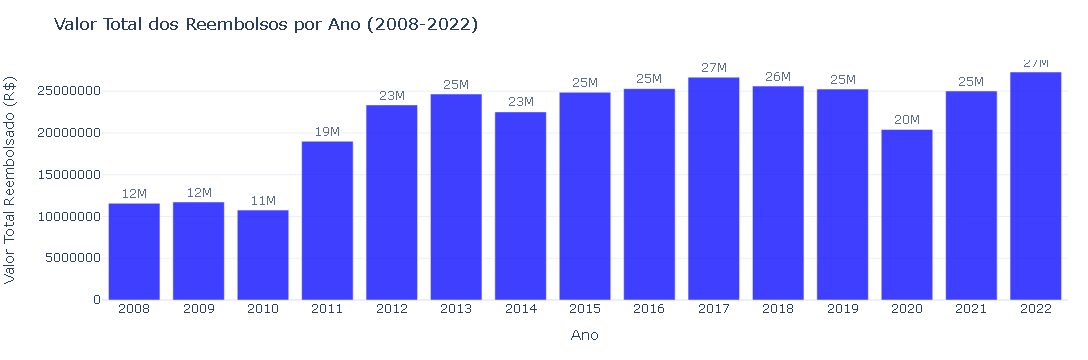

In [90]:
# Agrupando e somando os valores reembolsados por ano
valor_ano = ceaps_total.groupby('ANO')['VALOR_REEMBOLSADO'].sum().reset_index()

# Criando o gráfico de barras com Plotly Express
fig = px.bar(
    valor_ano,
    x='ANO',
    y='VALOR_REEMBOLSADO',
    title='Valor Total dos Reembolsos por Ano (2008-2022)',
    labels={'VALOR_REEMBOLSADO': 'Valor Total Reembolsado (R$)', 'ANO': 'Ano'},
    template='plotly_white',
    text='VALOR_REEMBOLSADO'  # Adicionar os valores das barras
)

# Ajustando o layout do gráfico para torná-lo mais atraente
fig.update_traces(
    texttemplate='%{text:.2s}',  # Formatar os valores para notação científica curta
    textposition='outside',  # Colocar os textos fora das barras
    marker_color='blue',  # Cor das barras
    opacity=0.75  # Transparência das barras
)

fig.update_layout(
    xaxis_title='Ano',
    yaxis_title='Valor Total Reembolsado (R$)',
    yaxis_tickformat='R$,',  # Formatando o eixo y para valores monetários
    xaxis=dict(
        tickmode='linear',  # Mostrando todos os anos
        tick0=2008,  # Começando em 2008
        dtick=1  # Intervalo de 1 ano
    ),
    margin=dict(l=20, r=20, t=60, b=60),  # Ajustar as margens
    font=dict(
        size=12  # Tamanho da fonte
    ),
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fundo transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Fundo do papel transparente
    showlegend=False  # Ocultar a legenda
)
fig.show()


10 Senadores que mais receberam reembolso CEAPS entre 2008 a 2022?

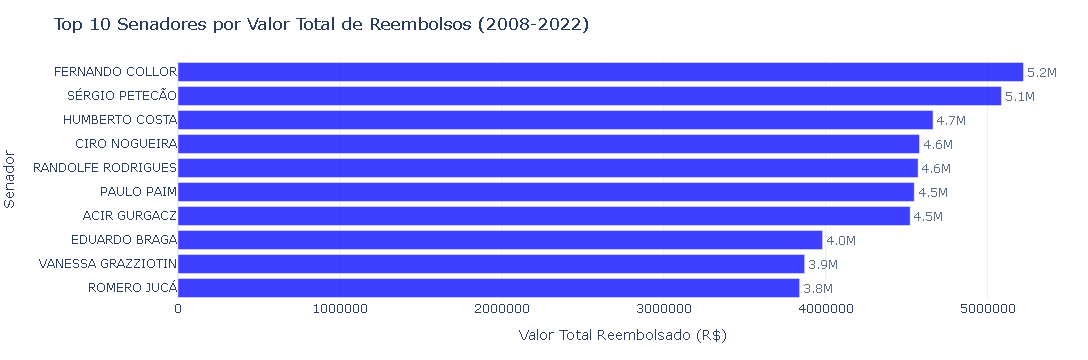

In [88]:
# Agrupando por SENADOR e somar os VALOR_REEMBOLSADO, ordenando em ordem decrescente e selecionando os top 10
top_senadores = ceaps_total.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False).head(10)

# Convertendo para DataFrame para facilitar a manipulação e visualização
top_senadores_df = top_senadores.to_frame().reset_index()

# Ordenando os senadores de forma decrescente pelos valores de reembolso
top_senadores_df = top_senadores_df.sort_values(by='VALOR_REEMBOLSADO', ascending=True)

# Criando o gráfico de barras horizontal com Plotly Express
fig = px.bar(
    top_senadores_df,
    x='VALOR_REEMBOLSADO',
    y='SENADOR',
    title='Top 10 Senadores por Valor Total de Reembolsos (2008-2022)',
    labels={'VALOR_REEMBOLSADO': 'Valor Total Reembolsado (R$)', 'SENADOR': 'Senador'},
    template='plotly_white',
    text='VALOR_REEMBOLSADO',
    orientation='h'  # Barra horizontal
)

# Ajustando o layout do gráfico
fig.update_traces(
    texttemplate='%{text:.2s}',  # Formatar os valores para notação científica curta
    textposition='outside',  # Colocar os textos fora das barras
    marker_color='blue',  # Cor das barras
    opacity=0.75  # Transparência das barras
)

# Configurando o formato do eixo X para valores monetários
fig.update_layout(
    xaxis_title='Valor Total Reembolsado (R$)',
    yaxis_title='Senador',
    xaxis=dict(
        tickformat='R$,.0f'  # Formato para valores monetários
    ),
    yaxis=dict(
        tickmode='linear',  # Mostrar todos os senadores
        tickfont=dict(size=12)  # Tamanho da fonte
    ),
    margin=dict(l=20, r=20, t=60, b=60),  # Ajustar as margens
    font=dict(
        size=12  # Tamanho da fonte
    ),
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fundo transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Fundo do papel transparente
    showlegend=False  # Ocultar a legenda
)
fig.show()


10 Senadores que mais receberam reembolso em 2022?

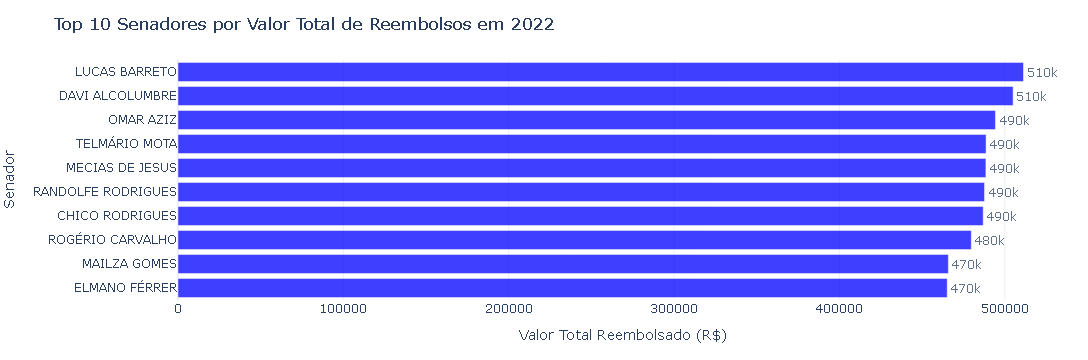

In [86]:
# Filtrando os dados para o ano de 2022
ceaps_2022 = ceaps_total[ceaps_total['ANO'] == 2022]

# Agrupando por SENADOR e somar os VALOR_REEMBOLSADO, ordenando em ordem decrescente e selecionando os top 10
top_senadores_2022 = ceaps_2022.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False).head(10)

# Convertendo para DataFrame para facilitar a manipulação e visualização
top_senadores_2022_df = top_senadores_2022.to_frame().reset_index()

# Ordenando os senadores de forma decrescente pelos valores de reembolso
top_senadores_2022_df = top_senadores_2022_df.sort_values(by='VALOR_REEMBOLSADO', ascending=False)

# Criando o gráfico de barras horizontal com Plotly Express
fig = px.bar(
    top_senadores_2022_df,
    x='VALOR_REEMBOLSADO',
    y='SENADOR',
    title='Top 10 Senadores por Valor Total de Reembolsos em 2022',
    labels={'VALOR_REEMBOLSADO': 'Valor Total Reembolsado (R$)', 'SENADOR': 'Senador'},
    template='plotly_white',
    text='VALOR_REEMBOLSADO',
)

# Ajustando o layout do gráfico
fig.update_traces(
    texttemplate='%{text:.2s}',  # Formatar os valores para notação científica curta
    textposition='outside',  # Colocar os textos fora das barras
    marker_color='blue',  # Cor das barras
    opacity=0.75  # Transparência das barras
)

# Configurando o formato do eixo X para valores monetários
fig.update_layout(
    xaxis_title='Valor Total Reembolsado (R$)',
    yaxis_title='Senador',
    xaxis=dict(
        tickformat='R$,.0f'  # Formato para valores monetários
    ),
    yaxis=dict(
        tickmode='linear',  # Mostrar todos os senadores
        tickfont=dict(size=12),  # Tamanho da fonte
        autorange='reversed'  # Reverter a ordem para maior gasto no topo
    ),
    margin=dict(l=20, r=20, t=60, b=60),  # Ajustar as margens
    font=dict(
        size=12  # Tamanho da fonte
    ),
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fundo transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Fundo do papel transparente
    showlegend=False  # Ocultar a legenda
)
fig.show()


Valor de reembolsos por tipo de despesa?

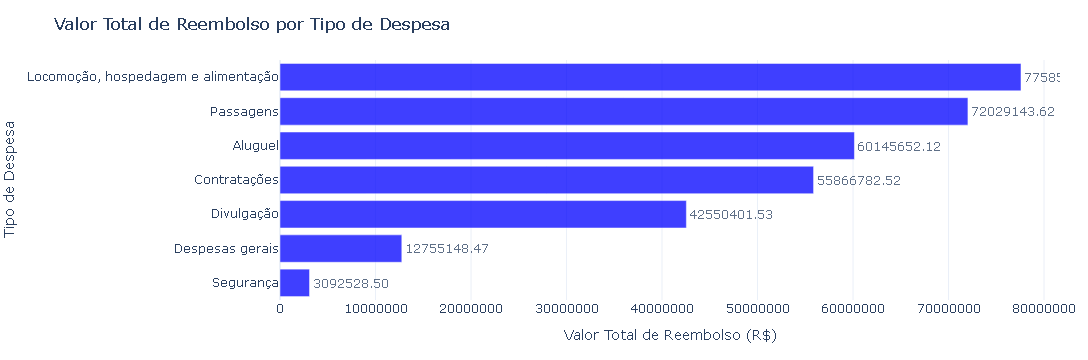

In [84]:
# Agrupando e somando os valores de reembolso por tipo de despesa
valor_total_por_tipo = ceaps_total.groupby('TIPO_DESPESA')['VALOR_REEMBOLSADO'].sum().reset_index()

# Ordenando os tipos de despesa pelo valor total de reembolso em ordem decrescente
valor_total_por_tipo = valor_total_por_tipo.sort_values(by='VALOR_REEMBOLSADO', ascending=True)

# Visualizando os principais tipos de despesa (ou todos, se desejar)
top_valor_total_por_tipo = valor_total_por_tipo.head(10)  # Aqui você pode ajustar para ver mais ou menos categorias

# Criando um gráfico de barras horizontal para visualizar os valores de reembolso por tipo de despesa
fig = px.bar(
    top_valor_total_por_tipo,
    x='VALOR_REEMBOLSADO',
    y='TIPO_DESPESA',
    title='Valor Total de Reembolso por Tipo de Despesa',
    labels={'VALOR_REEMBOLSADO': 'Valor Total de Reembolso (R$)', 'TIPO_DESPESA': 'Tipo de Despesa'},
    template='plotly_white',
    orientation='h',
    text='VALOR_REEMBOLSADO'
)

# Ajustando o layout do gráfico
fig.update_traces(
    texttemplate='%{text:.2f}',  # Mostrar os valores de reembolso nas barras
    textposition='outside',  # Colocar os textos fora das barras
    marker_color='blue',  # Cor das barras
    opacity=0.75  # Transparência das barras
)

fig.update_layout(
    xaxis_title='Valor Total de Reembolso (R$)',
    yaxis_title='Tipo de Despesa',
    yaxis=dict(
        tickmode='linear',  # Mostrar todos os tipos de despesa
        tickfont=dict(size=12)  # Tamanho da fonte
    ),
    xaxis_tickformat='R$,',  # Formato do eixo X para valores monetários
    margin=dict(l=20, r=20, t=60, b=60),  # Ajustar as margens
    font=dict(size=12),  # Tamanho da fonte
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fundo transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Fundo do papel transparente
    showlegend=False  # Ocultar a legenda
)
fig.show()


Valor de reembolsos por tipo de despesa em 2022?

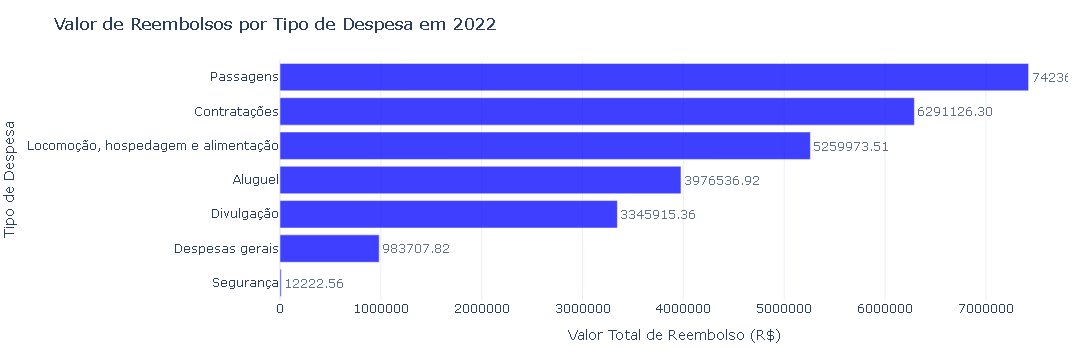

In [82]:
# Filtrando os dados para o ano de 2022
ceaps_2022 = ceaps_total[ceaps_total['ANO'] == 2022]

# Agrupando e somando os valores de reembolso por tipo de despesa em 2022
valor_total_por_tipo_2022 = ceaps_2022.groupby('TIPO_DESPESA')['VALOR_REEMBOLSADO'].sum().reset_index()

# Ordenando os tipos de despesa pelo valor total de reembolso em ordem decrescente
valor_total_por_tipo_2022 = valor_total_por_tipo_2022.sort_values(by='VALOR_REEMBOLSADO', ascending=True)

# Criando um gráfico de barras horizontal para visualizar os valores de reembolso por tipo de despesa em 2022
fig = px.bar(
    valor_total_por_tipo_2022,
    x='VALOR_REEMBOLSADO',
    y='TIPO_DESPESA',
    title='Valor de Reembolsos por Tipo de Despesa em 2022',
    labels={'VALOR_REEMBOLSADO': 'Valor Total de Reembolso (R$)', 'TIPO_DESPESA': 'Tipo de Despesa'},
    template='plotly_white',
    orientation='h',
    text='VALOR_REEMBOLSADO'
)

# Ajustando o layout do gráfico
fig.update_traces(
    texttemplate='%{text:.2f}',  # Mostrar os valores de reembolso nas barras
    textposition='outside',  # Colocar os textos fora das barras
    marker_color='blue',  # Cor das barras
    opacity=0.75  # Transparência das barras
)

fig.update_layout(
    xaxis_title='Valor Total de Reembolso (R$)',
    yaxis_title='Tipo de Despesa',
    yaxis=dict(
        tickmode='linear',  # Mostrar todos os tipos de despesa
        tickfont=dict(size=12)  # Tamanho da fonte
    ),
    xaxis_tickformat='R$,',  # Formato do eixo X para valores monetários
    margin=dict(l=20, r=20, t=60, b=60),  # Ajustar as margens
    font=dict(size=12),  # Tamanho da fonte
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fundo transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Fundo do papel transparente
    showlegend=False  # Ocultar a legenda
)
fig.show()


Gastos de 2019 a 2022 dividido por meses

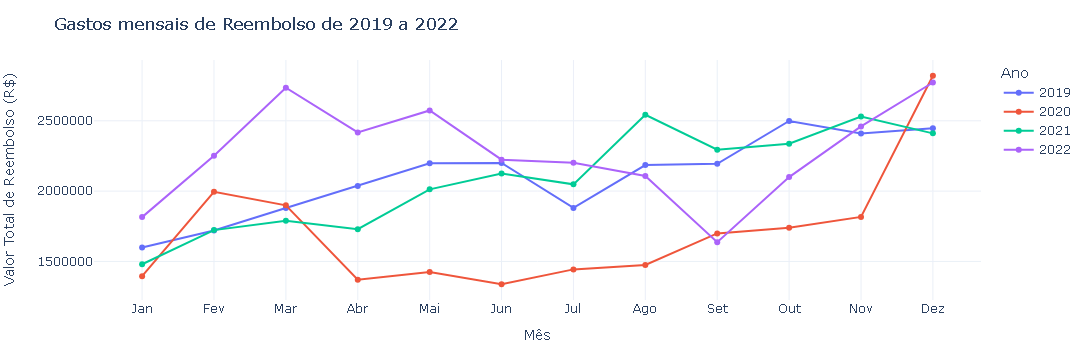

In [80]:
# Filtrando os dados para os anos de 2019 a 2022
ceaps_2019_2022 = ceaps_total[(ceaps_total['ANO'] >= 2019) & (ceaps_total['ANO'] <= 2022)]

# Agrupando e somando os valores de reembolso por mês e ano
gastos_mensais = ceaps_2019_2022.groupby(['ANO', 'MES'])['VALOR_REEMBOLSADO'].sum().reset_index()

# Criando o gráfico de linhas com cores diferentes para cada ano
fig = px.line(
    gastos_mensais,
    x='MES',  # Usar MES como eixo x
    y='VALOR_REEMBOLSADO',
    color='ANO',  # Colorir por ano
    title='Gastos mensais de Reembolso de 2019 a 2022',
    labels={'VALOR_REEMBOLSADO': 'Valor Total de Reembolso (R$)', 'MES': 'Mês', 'ANO': 'Ano'},
    template='plotly_white',
    markers=True  # Adicionar marcadores nos pontos de dados
)

# Ajustando o layout do gráfico
fig.update_layout(
    xaxis_title='Mês',
    yaxis_title='Valor Total de Reembolso (R$)',
    xaxis_tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],  # Definir os valores dos ticks no eixo x
    xaxis_ticktext=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'],  # Nome dos meses no eixo x
    yaxis_tickformat='R$,',  # Formato para valores monetários
    font=dict(size=12),  # Tamanho da fonte
    margin=dict(l=20, r=20, t=60, b=60),  # Ajustar margens
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fundo do gráfico transparente
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Fundo do papel transparente
    showlegend=True,  # Mostrar legenda
    legend_title_text='Ano'  # Título da legenda
)
fig.show()
